# Scrapbook

This document is a scrap workbook.

In [1]:
# import standard libraries
# I should really turn this into a snippet
from collections import Counter  # useful for tallying results
import qiskit as q
import qiskit.tools.monitor as monitor
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

q.IBMQ.load_accounts()

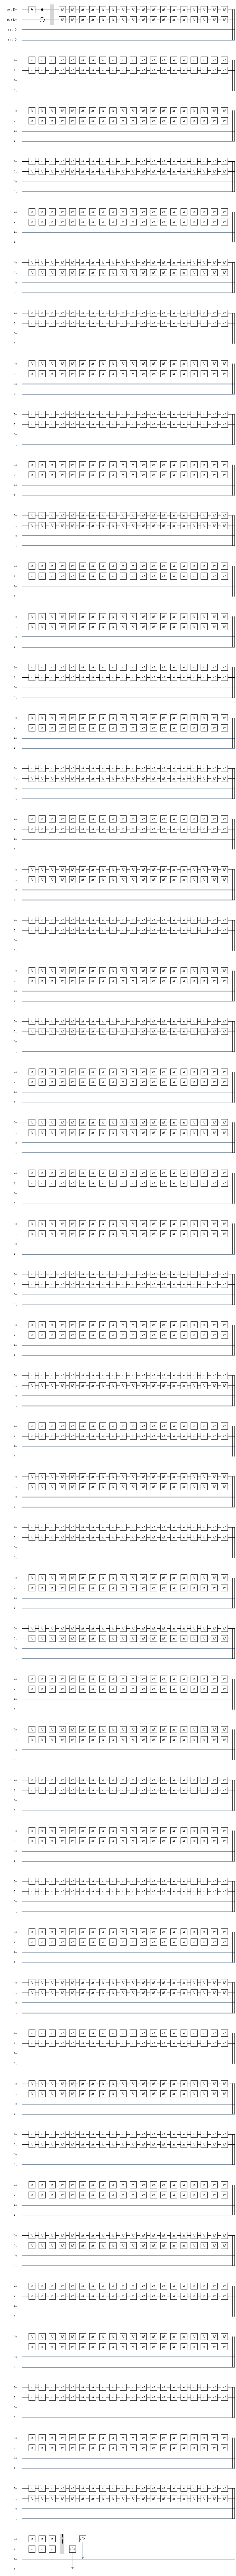

In [10]:
qr = q.QuantumRegister(2, 'q')
cr = q.ClassicalRegister(2, 'c')

circuit = q.QuantumCircuit(qr, cr)
circuit.h(qr[0])
circuit.cx(qr[0], qr[1])
circuit.barrier()
for _ in range(1000):
    circuit.iden(qr)
circuit.barrier()
circuit.measure(qr, cr)

circuit.draw(output='mpl')

In [11]:
# this should probably also be a snippet, albeit in a little wrapper function
# locate least busy IBM device backend
backends = q.IBMQ.backends(filters=lambda x:
                           x.configuration().n_qubits >= 2
                           and not
                           x.configuration().simulator)
best = q.providers.ibmq.least_busy(backends)

# run the trials on that backend
# empty = q.tools.compiler.PassManager()  # disable optimization
job = q.execute(circuit, backend=best, shots=1024,
                max_credits=10)
monitor.job_monitor(job)

# print job info for later retrieval if necessary
print('Job ID \'%s\'' % job.job_id())
print('Ran on backend \'%s\'' % best.name())
print('Completed %s' % job.creation_date())

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

Job ID '5ccc6d4378331e007870d7d9'
Ran on backend 'ibmqx2'
Completed 2019-05-03T16:33:07.589Z


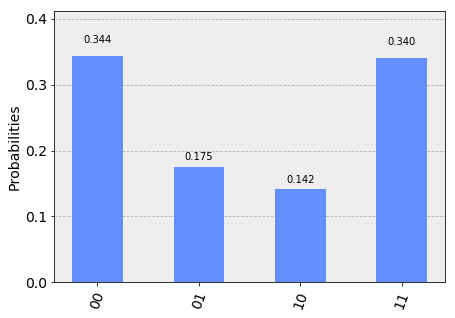

In [12]:
import qiskit.tools.visualization as viz

counts = job.result().get_counts(circuit)
viz.plot_histogram(counts)

> 5/10/19

So apparently, Qiskit Ignis has 